In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("./fer2013.csv")

In [3]:
width,height=48,48
datapoints=data['pixels'].tolist()

In [4]:
x=[]
for i in datapoints:
    xx=[int(xp) for xp in i.split(' ')]
    xx=np.asarray(xx).reshape(width,height)
    x.append(xx.astype('float32'))


In [5]:
x=np.asarray(x)
x

array([[[  70.,   80.,   82., ...,   52.,   43.,   41.],
        [  65.,   61.,   58., ...,   56.,   52.,   44.],
        [  50.,   43.,   54., ...,   49.,   56.,   47.],
        ..., 
        [  91.,   65.,   42., ...,   72.,   56.,   43.],
        [  77.,   82.,   79., ...,  105.,   70.,   46.],
        [  77.,   72.,   84., ...,  106.,  109.,   82.]],

       [[ 151.,  150.,  147., ...,  129.,  140.,  120.],
        [ 151.,  149.,  149., ...,  122.,  141.,  137.],
        [ 151.,  151.,  156., ...,  109.,  123.,  146.],
        ..., 
        [ 188.,  188.,  121., ...,  185.,  185.,  186.],
        [ 188.,  187.,  196., ...,  186.,  182.,  187.],
        [ 186.,  184.,  185., ...,  193.,  183.,  184.]],

       [[ 231.,  212.,  156., ...,   44.,   27.,   16.],
        [ 229.,  175.,  148., ...,   27.,   35.,   27.],
        [ 214.,  156.,  157., ...,   28.,   22.,   28.],
        ..., 
        [ 241.,  245.,  250., ...,   57.,  101.,  146.],
        [ 246.,  250.,  252., ...,   78., 

In [6]:
x=np.expand_dims(x,-1)
x

array([[[[  70.],
         [  80.],
         [  82.],
         ..., 
         [  52.],
         [  43.],
         [  41.]],

        [[  65.],
         [  61.],
         [  58.],
         ..., 
         [  56.],
         [  52.],
         [  44.]],

        [[  50.],
         [  43.],
         [  54.],
         ..., 
         [  49.],
         [  56.],
         [  47.]],

        ..., 
        [[  91.],
         [  65.],
         [  42.],
         ..., 
         [  72.],
         [  56.],
         [  43.]],

        [[  77.],
         [  82.],
         [  79.],
         ..., 
         [ 105.],
         [  70.],
         [  46.]],

        [[  77.],
         [  72.],
         [  84.],
         ..., 
         [ 106.],
         [ 109.],
         [  82.]]],


       [[[ 151.],
         [ 150.],
         [ 147.],
         ..., 
         [ 129.],
         [ 140.],
         [ 120.]],

        [[ 151.],
         [ 149.],
         [ 149.],
         ..., 
         [ 122.],
         [ 141.],
    

In [7]:
y=pd.get_dummies(data['emotion']).as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
np.save('fdatax',x)
np.save('flabels',y)

In [9]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2

Using TensorFlow backend.


In [10]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

In [11]:
x = np.load('./fdataX.npy')
y = np.load('./flabels.npy')

x -= np.mean(x, axis=0)
x /= np.std(x, axis=0)

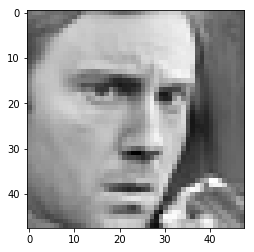

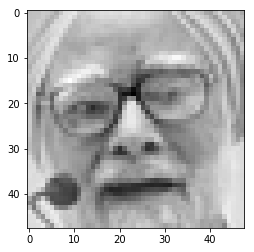

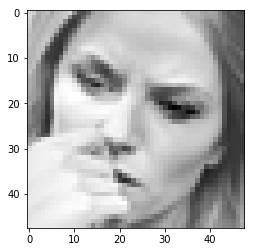

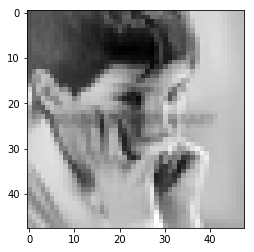

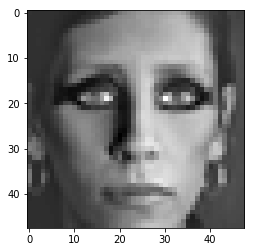

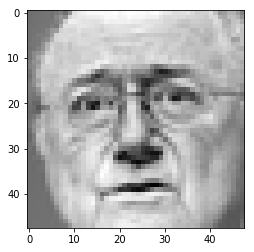

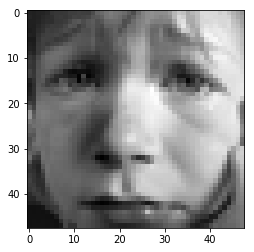

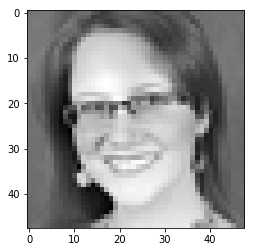

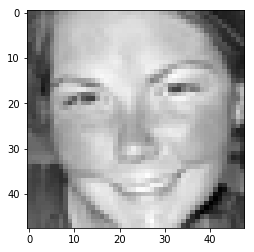

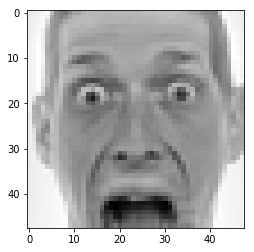

In [22]:
import matplotlib.pyplot as plt
for xx in range(10):
    plt.figure(xx)
    plt.imshow(x[xx].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=41)
np.save('modXtest', X_test)
np.save('modytest', y_test)

In [28]:
model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

In [29]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),metrics=['accuracy'])

In [ ]:
model.fit(np.array(X_train), np.array(y_train),batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(np.array(X_valid), np.array(y_valid)),shuffle=True)

In [ ]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [14]:
from keras.models import model_from_json
json_file = open('fer.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
#load woeights into new model
loaded_model.load_weights("fer.h5")
print("Loaded Model from disk")

#compile and evaluate loaded model
loaded_model.compile(loss=categorical_crossentropy,optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),metrics=['accuracy'])

Loaded Model from disk


In [15]:
y_predict=loaded_model.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [18]:
y1=[]
yy1=[]
for i in range(0,3589):
    z=0
    zz=0
    z1=-1
    zz1=-1
    for j in range(0,7):
        if z<y_predict[i][j]:
            z=y_predict[i][j]
            z1=j+1
        if zz<y_test[i][j]:
            zz=y_test[i][j]
            zz1=j+1
    y1.append(z1)
    yy1.append(zz1)

In [19]:
print("Accuracy:",metrics.accuracy_score(yy1, y1)*100.0)

Accuracy: 66.3694622458


In [24]:
X_test

array([[[[ 0.26673266],
         [ 0.38327095],
         [ 0.47694322],
         ..., 
         [-0.288515  ],
         [-0.31984898],
         [-0.31479502]],

        [[ 0.28244931],
         [ 0.38897794],
         [ 0.48254514],
         ..., 
         [-0.34010211],
         [-0.28431427],
         [-0.18142964]],

        [[ 0.28752804],
         [ 0.38146472],
         [ 0.50076848],
         ..., 
         [-0.31560954],
         [-0.39662957],
         [-0.26737121]],

        ..., 
        [[-1.27733672],
         [-1.20884824],
         [-1.24297237],
         ..., 
         [-1.18539667],
         [-1.1604799 ],
         [-1.08677733]],

        [[-1.30519438],
         [-1.27370119],
         [-1.29475796],
         ..., 
         [-1.21117055],
         [-1.19812381],
         [-1.13704288]],

        [[-1.32955456],
         [-1.32441401],
         [-1.31695199],
         ..., 
         [-1.23546755],
         [-1.2096591 ],
         [-1.14833534]]],


       [[[-0.72776